## Exploração dos dados obtidos via API Strava 😄👩‍💻🚀

Este notebook foi desenvolvido com o objetivo de realizar uma análise detalhada dos dados obtidos pela API Strava. A API é uma meio que permite acessar uma rica coleção de dados relacionados a atividades físicas, como o ciclismo 🚵, natação 🏊, corrida 🏃, entre outras. Os dados incluem métricas como distância percorrida, tempo da atividade, elevação, batimentos cardiacos, etc.

A seleção de dados para este notebook foi realizada mantendo apenas aqueles dados relevantes para as questões propostas 🎯. Além disso, um processo de limpeza foi aplicado para garantir a precisão e a qualidade das análises. O foco está em extrair *insights* relevantes que possam responder a perguntas específicas sobre padrões de atividades físicas, tendências ao longo do tempo e comportamento dos atletas 🏅.

Com a combinação de métodos estatísticos e visualizações gráficas, este notebook busca não apenas responder a perguntas predefinidas, mas também descobrir novas perspectivas e histórias contadas pelos dados 📊📈.

✨ **Os dados a seguir foram extraídos de uma conta de um atleta amador do Strava.** ✨

##### 📚 Importando as bibliotecas

In [1]:
# Importação de bibliotecas
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import kaleido
from numpy import polyfit, poly1d
import plotly.express as px

# Configurações globais para visualizações
%matplotlib inline
sns.set_theme(style="darkgrid")

caminho_usuario = os.path.expanduser('~')
file = 'Desktop\\codigos\\Python\\Strava_PB_PY\\PY_PB_Strava\\data\\processed\\data.csv'
arquivo = os.path.join(caminho_usuario, file)

##### 📁 Carregamento dos dados no dataframe df

In [6]:
df = pd.read_csv(arquivo)

##### 🔍 Análise Exploratória de Dados (EDA)

##### O arquivo contém as seguintes variaveis
    
*   **name:** O nome dado à atividade pelo usuário.
*   **distance:** A distância total percorrida durante a atividade, geralmente em metros.
*   **moving_time:** O tempo total em movimento, excluindo as paradas, geralmente em segundos.
*   **elapse_time:** O tempo total decorrido desde o início até o fim da atividade, incluindo todas as paradas, geralmente em segundos.
*   **total_elevation_gain:** O ganho total de elevação durante a atividade, 0geralmente em metros.
*   **sport_type:** Um campo mais específico que detalha o tipo de esporte dentro de uma categoria de atividade.
*   **start_date_local:** A data e hora de início da atividade.
*   **achievement_count:** O número de conquistas ganhas durante a atividade.
*   **kudos_count:** O número curtidas que a atividade recebeu.
*   **comment_count:** O número de comentários feitos na atividade.
*   **photo_count:** O número de fotos associadas à atividade.
*   **average_speed:** A velocidade média durante a atividade, geralmente em metros por segundo.
*   **max_speed:** A velocidade máxima atingida durante a atividade.
*   **average_heartrate:** A frequência cardíaca média durante a atividade.
*   **max_heartrate:** A frequência cardíaca máxima alcançada durante a atividade.
*   **elev_high:** A maior elevação alcançada durante a atividade.
*   **elev_low:** A menor elevação durante a atividade.
*   **pr_count:** O número de recordes pessoais alcançados durante a atividade.

In [7]:
# Resumo estatístico das variáveis numéricas
df.describe()

,distance,moving_time,elapsed_time,total_elevation_gain,achievement_count,kudos_count,comment_count,photo_count,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,duracao
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.0,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,3.082673,2861.904425,2935.484956,24.691504,0.711504,1.281416,0.012389,0.0,6.251365,9.941002,131.727469,159.020920,354.914350,340.939376,0.307965,2935.484956
std,4.052818,2202.228507,2230.159184,38.748344,3.729786,1.632045,0.173171,0.0,4.673439,9.132243,24.679544,20.513708,254.267174,243.691163,2.355924,2230.159184
min,0.000000,20.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,73.600000,94.000000,0.000000,0.000000,0.000000,23.000000
25%,0.000000,768.000000,863.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,108.100000,143.000000,0.000000,0.000000,0.000000,863.000000
50%,0.783600,2642.000000,2760.000000,3.900000,0.000000,1.000000,0.000000,0.0,8.161200,12.445200,135.400000,163.000000,527.919210,507.764452,0.000000,2760.000000
75%,5.999500,4339.000000,4409.000000,38.700000,0.000000,2.000000,0.000000,0.0,9.529200,14.871600,154.100000,177.000000,527.919210,507.764452,0.000000,4409.000000
max,24.075400,11458.000000,11606.000000,250.900000,75.000000,13.000000,3.000000,0.0,16.286400,46.184400,174.400000,190.000000,914.700000,811.400000,39.000000,11606.000000


In [8]:
# Resumo sobre o dataframe, nome das colunas, quantidade dos não nulos e o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  565 non-null    object 
 1   distance              565 non-null    float64
 2   moving_time           565 non-null    int64  
 3   elapsed_time          565 non-null    int64  
 4   total_elevation_gain  565 non-null    float64
 5   sport_type            565 non-null    object 
 6   start_date_local      565 non-null    object 
 7   achievement_count     565 non-null    int64  
 8   kudos_count           565 non-null    int64  
 9   comment_count         565 non-null    int64  
 10  photo_count           565 non-null    int64  
 11  average_speed         565 non-null    float64
 12  max_speed             565 non-null    float64
 13  average_heartrate     565 non-null    float64
 14  max_heartrate         565 non-null    float64
 15  elev_high             5

In [9]:
# Amostra dos dados, contendo as 5 primeiras linhas do dataframe
df.head()

,name,distance,moving_time,elapsed_time,total_elevation_gain,sport_type,start_date_local,achievement_count,kudos_count,comment_count,photo_count,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,data,duracao
0,5/15 ✌🏼,6.0165,2650,2738,66.6,corrida,2024-06-10 17:21:56+00:00,0,1,0,0,8.1720,12.1788,153.6,175.0,527.91921,507.764452,0,2024-06-10,2738
1,4/15 🤩🔝,10.5275,4241,4409,70.4,corrida,2024-06-09 06:43:05+00:00,0,6,0,0,8.9352,31.9068,154.4,179.0,527.91921,507.764452,0,2024-06-09,4409
2,3/15 🫶🏼,5.7072,2564,2585,17.4,corrida,2024-06-07 17:23:02+00:00,0,2,0,0,8.0136,14.4864,145.9,175.0,527.91921,507.764452,0,2024-06-07,2585
3,Treinamento com peso vespertino,0.0000,4507,4507,0.0,treino com peso,2024-06-06 17:14:51+00:00,0,0,0,0,0.0000,0.0000,98.4,142.0,0.00000,0.000000,0,2024-06-06,4507
4,2/15 ✌🏼,6.0084,2640,2676,54.5,corrida,2024-06-05 17:21:33+00:00,0,2,0,0,8.1936,13.4496,158.2,178.0,527.91921,507.764452,0,2024-06-05,2676


👀 Nota-se que não há valores em branco/nulos, os dados não são somente números, há objetos, como por exemplo nome da atividade, tipo do esporte. 
*   Percebemos que a maior quilometragem alcansada foi de 24km;
*   O maior ganho de elevação foi de 250 metros;
*   Foram alcançados no máximo 39 recordes pessoais em uma atividade;
*   O ritmo cardiaco chegou aos 190 bpm;
*   A maior duração de uma atividade foi de 3 horas 13 minutos e 26 segundos;
*   Há diversos tipos de atividades nesta base, como: corrida, treino com peso, como podemos observar nas 5 primeiras linhas do comando *head()*.

#### 📊👀 **Análise Visual dos Dados de Atividades Físicas**
Vamos explorar os dados através de gráficos interativos que respondam às seguintes perguntas:

- 📅 Quantas atividades foram feitas neste mês? ✅
- 🏃‍♀️ Qual está sendo a atividade física mais praticada neste mês? ✅
- 📅 Quantas atividades foram feitas neste ano? ✅
- 🏃‍♂️ Qual está sendo a atividade física mais praticada este ano? ✅
- 📅 Quantos dias em movimento mês a mês com a linha de média? ✅
- 📅 Quantas atividades por tipo de esporte foram feitas mês a mês? ✅
- ⏱️ Qual é o tempo em movimento mês a mês? ✅
- 🔄 Qual é o tempo em movimento mês a mês por atividade física? ✅
- 📏 Quais são as distâncias percorridas mês a mês? ✅
- ⛰️ Quais são os ganhos de elevação mês a mês? ✅


In [10]:
# Converta 'start_date_local' e 'data' para datetime e extraia o mês e o ano
df['start_date_local'] = pd.to_datetime(df['start_date_local'])
df['data'] = pd.to_datetime(df['data'])
df['month'] = df['start_date_local'].dt.month
df['year'] = df['start_date_local'].dt.year

In [11]:
# 📅 Quantas atividades foram feitas neste mês/ano? ✅
atividades_mes = df[
    (df['month'] == pd.Timestamp('today').month)
    &
    (df['year'] == pd.Timestamp('today').year)]

print(f"Atividades neste mês: {atividades_mes.shape[0]}")

# 🏃‍♀️ Qual está sendo a atividade física mais praticada neste mês/ano? ✅
# Contagem de categorias e a escolha do maior
atividade_do_mes = atividades_mes['sport_type'].value_counts().idxmax()
print(f"Atividade mais praticada neste mês: {atividade_do_mes}")

# Contagem de atividades por tipo de esporte
contagem_atividades = atividades_mes['sport_type'].value_counts().reset_index()
contagem_atividades.columns = ['Tipo de atividade', 'Quantidade de atividades']

# Gráfico de barras com a contagem de atividades por tipo de esporte
fig = px.bar(contagem_atividades, x='Tipo de atividade', y='Quantidade de atividades', title='Atividades Físicas Mais Praticadas Neste Mês')
fig.show()
fig.write_image("meu_grafico01.png")

Atividades neste mês: 9
Atividade mais praticada neste mês: corrida


Este gráfico é útil para identificar as preferências de exercícios e pode ajudar a entender as tendências de atividades físicas dentro de um determinado período, neste caso dentro do mês atual.

In [20]:
# 📅 Quantas atividades foram feitas neste ano?
atividades_ano = df[df['year'] == pd.Timestamp('today').year]
print(f"Atividades neste ano: {atividades_ano.shape[0]}")

# 🏃‍♂️ Qual está sendo a atividade física mais praticada este ano?
atividade_mais_praticada_ano = atividades_ano['sport_type'].value_counts()
print(f"Atividade mais praticada este ano: {atividade_mais_praticada_ano.idxmax()}")

# Contagem de atividades por tipo de esporte
contagem_atividades_ano = atividades_ano['sport_type'].value_counts().reset_index()
contagem_atividades_ano.columns = ['Tipo de atividade', 'Quantidade de atividades']

# Gráfico de barras com a contagem de atividades por tipo de esporte
fig = px.bar(contagem_atividades_ano, x='Tipo de atividade', y='Quantidade de atividades', title='Atividades Físicas Mais Praticadas Neste Ano')
fig.show()
fig.write_image("meu_grafico02.png")

Atividades neste ano: 148
Atividade mais praticada este ano: corrida


Esse gráfico é útil para identificar as preferências de exercícios e pode ajudar a entender as tendências de atividades físicas dentro de um determinado período, neste caso, dentro do ano atual.

In [21]:
# 📅 Quantos dias em movimento mês a mês com a linha de média? ✅
# Preparar os dados
df['ano_mes'] = df['data'].dt.strftime('%m-%Y')

# Agrupar os dados e excluindo as datas duplicadas deixando apenas uma
# Renomeando as colunas
contagem_dias = df.groupby('ano_mes')['data'].nunique().reset_index()
contagem_dias.columns = ['Ano/Mês', 'Dias em movimento']

# Calculando a média
media = contagem_dias['Dias em movimento'].mean()

# Ordenando os dados
contagem_dias['Ano/Mês'] = pd.to_datetime(contagem_dias['Ano/Mês'], format='%m-%Y')
contagem_dias.sort_values(by='Ano/Mês', inplace=True)
contagem_dias['Ano/Mês'] = contagem_dias['Ano/Mês'].dt.strftime('%m-%Y')

# Plotar o gráfico
fig = px.bar(contagem_dias, x='Ano/Mês', y='Dias em movimento', title='Dias em Movimento Mês à Mês')
fig.add_hline(y=media, line_dash="dot", annotation_text="", annotation_position="bottom right")

# Adicionar rótulo de dados na linha da média
fig.add_annotation(
    xref="paper", x=1, y=media,
    text=f"Média: {media:.0f} dias",
    showarrow=False,
    yshift=10,
    bordercolor='red',
    bgcolor='pink')

# Mostrar o gráfico
fig.show()
fig.write_image("meu_grafico03.png")


Analisando o gráfico ‘Dias em Movimento Mês à Mês’, podemos observar que o número de dias em movimento varia consideravelmente de um mês para outro. A maioria dos meses está próxima da média de 19 dias, mas há variações significativas.

*   De novembro de 2022 a maio de 2023, os valores estão abaixo da média. Isso pode ser explicado pelo fato de que o indivíduo estava iniciando seus treinos e gradualmente estabelecendo uma rotina.
*   Em junho de 2023, houve uma estabilização, indicando que o hábito de atividade física estava se consolidando.
*   Em março de 2024, houve uma queda acentuada. Isso pode estar relacionado a uma lesão ou algum evento específico.
*   No entanto, em abril de 2024, o indivíduo retomou as atividades e superou a média, alcançando mais de 19 dias em movimento.

In [22]:
# 📅 Quantas atividades por tipo de esporte foram feitas mês a mês?
# Agrupar os dados por 'ano_mes' e 'sport_type'
atividades_por_tipo = df.groupby(['ano_mes', 'sport_type']).size().reset_index(name='Quantidade')
atividades_por_tipo.columns = ["Ano/Mês", "Tipo de esporte", "Quantidade"]

# Ordenar os dados
atividades_por_tipo['Ano/Mês'] = pd.to_datetime(atividades_por_tipo['Ano/Mês'], format='%m-%Y')
atividades_por_tipo.sort_values(by='Ano/Mês', inplace=True)
atividades_por_tipo['Ano/Mês'] = atividades_por_tipo['Ano/Mês'].dt.strftime('%m-%Y')

# Plotar o gráfico de barras
fig = px.bar(atividades_por_tipo, x='Ano/Mês', y='Quantidade', color='Tipo de esporte',
             title='Quantidade de Atividades por Tipo de Esporte Mês a Mês')

# Mostrar o gráfico
fig.show()
fig.write_image("meu_grafico04.png")


Com base no gráfico “Quantidade de Atividades por Tipo de Esporte Mês a Mês”, podemos tirar algumas conclusões:

*   Variação Mensal: O número de atividades por tipo de esporte varia ao longo dos meses. Alguns esportes têm maior frequência em determinados meses.
*   Esportes Mais Praticados: A atividade de corrida (running) parece ser a mais frequente na maioria dos meses.
*   Observa-se uma tendência sazonal, onde alguns esportes têm picos em determinados meses ou estações.
*   Diversidade de Esportes: O gráfico mostra que diferentes tipos de esporte são praticados regularmente, incluindo treino com peso, caminhada, natação, bicicleta e simulador de escadas.

In [23]:
# Qual é o tempo em movimento mês a mês?
# Agrupando pela coluna mês/ano e somando os segundos gastos na atividade
tempo_em_movimento = df.groupby("ano_mes")['duracao'].sum().reset_index()

# Ordenando os dados
tempo_em_movimento["ano_mes"] = pd.to_datetime(tempo_em_movimento["ano_mes"], format="%m-%Y")
tempo_em_movimento.sort_values(by="ano_mes", inplace=True)
tempo_em_movimento["ano_mes"] = tempo_em_movimento["ano_mes"].dt.strftime("%m-%Y")

# Convertendo segundos -> horas
tempo_em_movimento["duracao"] = tempo_em_movimento["duracao"] / 3600 
tempo_em_movimento.columns = ["Mês/Ano", "Tempo (h)"]

# 5. Plotar o gráfico de linhas
fig = px.line(tempo_em_movimento, x='Mês/Ano', y='Tempo (h)', title='Tempo em Movimento Mês a Mês')

# Mostrar o gráfico
fig.show()
fig.write_image("meu_grafico05.png")

O gráfico ‘Tempo em Movimento Mês a Mês’ apresenta as variações no tempo de atividade física ao longo do período analisado:

*   Tempo: Representa os meses e anos, variando de novembro de 2022 a junho de 2024.
*   Horas: A escala vertical mede o tempo em horas dedicado à atividade física.
*   Padrões de Tempo em Movimento:
    *   O gráfico mostra picos e vales, indicando períodos com mais ou menos tempo em movimento.
    *   Não há uma tendência linear clara; o tempo em movimento varia de forma irregular.
*   Observações Específicas:
    *   Maio de 2023: A redução no tempo em movimento pode ser atribuída às férias tiradas pelo indivíduo.
    *   Dezembro de 2023: Durante o fim do ano, o descanso também afetou o tempo em movimento, o que é comum nas festas de fim de ano.
    *   Março de 2024: A lesão provavelmente limitou a atividade física nesse mês, como é esperado durante o processo de recuperação.

In [24]:
# 🔄 Qual é o tempo em movimento mês a mês por atividade física? ✅
# Agrupar os dados por 'ano_mes' e 'sport_type'
tempo_em_movimento_por_atividade = df.groupby(['ano_mes', 'sport_type'])['duracao'].sum().reset_index()

# Ordenar os dados
tempo_em_movimento_por_atividade['ano_mes'] = pd.to_datetime(tempo_em_movimento_por_atividade['ano_mes'], format='%m-%Y')
tempo_em_movimento_por_atividade.sort_values(by='ano_mes', inplace=True)
tempo_em_movimento_por_atividade['ano_mes'] = tempo_em_movimento_por_atividade['ano_mes'].dt.strftime('%m-%Y')

# Converter 'duracao_segundos' de segundos para horas
tempo_em_movimento_por_atividade['duracao_horas'] = tempo_em_movimento_por_atividade['duracao'] / 3600
tempo_em_movimento_por_atividade.columns = ["Mês/Ano", "Tipo de esporte", "Tempo (s)", "Tempo (h)"]

# Plotar o gráfico de barras
fig = px.bar(tempo_em_movimento_por_atividade, x='Mês/Ano', y='Tempo (h)', color='Tipo de esporte',
             title='Tempo em Movimento Mês a Mês por Atividade Física (Horas)')

# Mostrar o gráfico
fig.show()
fig.write_image("meu_grafico06.png")

Observamos que, na maioria dos meses, os esportes predominantes são corrida e treino com peso. A partir de abril de 2024, notamos uma heterogeneidade nos tipos de esporte. Nesse mesmo mês, a atividade de corrida não foi encontrada, pois o indivíduo estava parado nesse exercício, explorando outras modalidades. Em maio de 2024, a corrida foi retomada, mas o indivíduo continuou praticando outras atividades. 🏃‍♂️💪

In [25]:
# 📏 Quais são as distâncias percorridas mês a mês? ✅
# Agrupar os dados por 'ano_mes' e somar a 'distance'
distancias_percorridas = df.groupby('ano_mes')['distance'].sum().reset_index()

# Calcular distância média
media = distancias_percorridas['distance'].mean()

# Ordenar os dados
distancias_percorridas['ano_mes'] = pd.to_datetime(distancias_percorridas['ano_mes'], format='%m-%Y')
distancias_percorridas.sort_values(by='ano_mes', inplace=True)
distancias_percorridas['ano_mes'] = distancias_percorridas['ano_mes'].dt.strftime('%m-%Y')
distancias_percorridas.columns = ["Mês/Ano", "Soma das distâncias"]

# Plotar o gráfico de barras
fig = px.bar(distancias_percorridas, x='Mês/Ano', y='Soma das distâncias', title='Distâncias Percorridas Mês a Mês')
fig.add_hline(y=media, line_dash="dot", annotation_text="", annotation_position="bottom right")

# Adicionar rótulo de dados na linha da média
fig.add_annotation(
    xref="paper", x=1, y=media,
    text=f"Média: {media:.0f} Km/mês",
    showarrow=False,
    yshift=10,
    bordercolor='red',
    bgcolor='pink')

# Mostrar o gráfico
fig.show()
fig.write_image("meu_grafico07.png")

O gráfico apresenta uma série de barras, cada uma representando uma distância específica percorrida. Os meses correspondentes estão indicados no eixo horizontal, variando de “11/2022” a “06/2024”. O eixo vertical representa a distância em quilômetros, variando de 0 a 180 km. As alturas das barras variam, indicando diferentes distâncias percorridas em cada mês.

Além disso, há uma linha pontilhada no gráfico, aproximadamente aos 86 km, com uma legenda à direita que diz “Média: 86 km rodados”. Isso sugere que essa é a média das distâncias percorridas ao longo desse período.

Observamos que a tendência até fevereiro de 2024 estava em crescimento. No entanto, após a lesão em março de 2024, houve uma tendência de queda até o mês de maio de 2024, quando houve o retorno às atividades de corrida.

In [26]:
# ⛰️ Quais são os ganhos de elevação mês a mês? ✅
# Agrupar os dados por 'ano_mes' e somar a 'distance'
distancias_percorridas = df.groupby('ano_mes')['total_elevation_gain'].sum().reset_index()

# Calcular distância média
media = distancias_percorridas['total_elevation_gain'].mean()

# Ordenar os dados
distancias_percorridas['ano_mes'] = pd.to_datetime(distancias_percorridas['ano_mes'], format='%m-%Y')
distancias_percorridas.sort_values(by='ano_mes', inplace=True)
distancias_percorridas['ano_mes'] = distancias_percorridas['ano_mes'].dt.strftime('%m-%Y')
distancias_percorridas.columns = ["Mês/Ano", "Soma das elevações"]

# Plotar o gráfico de barras
fig = px.bar(distancias_percorridas, x='Mês/Ano', y='Soma das elevações', title='Elevações Percorridas Mês a Mês')
fig.add_hline(y=media, line_dash="dot", annotation_text="", annotation_position="bottom right")

# Adicionar rótulo de dados na linha da média
fig.add_annotation(
    xref="paper", x=1, y=media,
    text=f"Média: {media:.0f} m/mês",
    showarrow=False,
    yshift=10,
    bordercolor='red',
    bgcolor='pink')

# Mostrar o gráfico
fig.show()
fig.write_image("meu_grafico08.png")

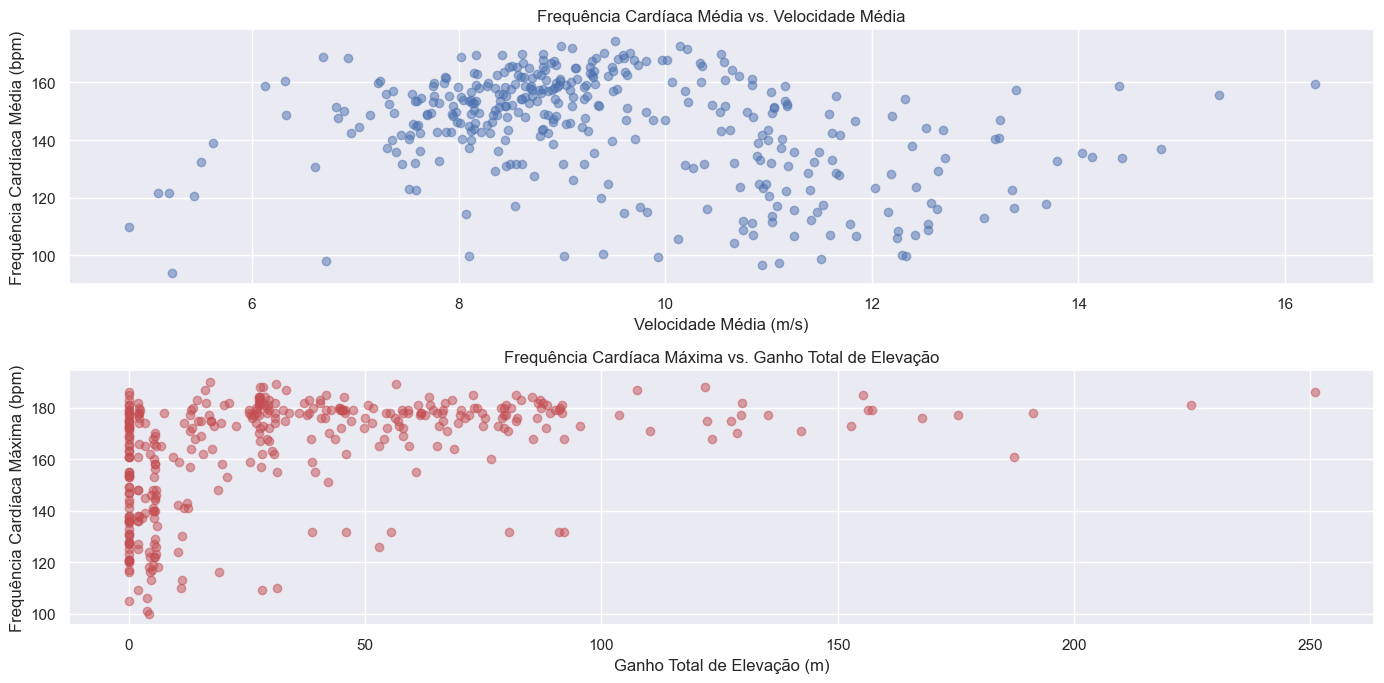

In [19]:
df_calc = df[(df['sport_type'] == "corrida")].copy()

plt.figure(figsize=(14, 7))

# Gráfico para frequência cardíaca média vs. velocidade média
plt.subplot(2, 1, 1)
plt.scatter(df_calc['average_speed'], df_calc['average_heartrate'], alpha=0.5)
plt.title('Frequência Cardíaca Média vs. Velocidade Média')
plt.xlabel('Velocidade Média (m/s)')
plt.ylabel('Frequência Cardíaca Média (bpm)')
plt.grid(True)

# Agora, um gráfico para a relação entre a frequência cardíaca máxima e a elevação máxima
plt.subplot(2, 1, 2)
plt.scatter(df_calc['total_elevation_gain'], df_calc['max_heartrate'], alpha=0.5, color='r')
plt.title('Frequência Cardíaca Máxima vs. Ganho Total de Elevação')
plt.xlabel('Ganho Total de Elevação (m)')
plt.ylabel('Frequência Cardíaca Máxima (bpm)')
plt.grid(True)

plt.tight_layout()
plt.show()

Gráfico Superior: Frequência Cardíaca Média vs. Velocidade Média
Eixo X: Velocidade Média (m/s)
Eixo Y: Frequência Cardíaca Média (bpm)
Os pontos de dados azuis mostram uma distribuição que sugere uma correlação entre a velocidade média e a frequência cardíaca média. Isso pode indicar que, à medida que a velocidade média durante a atividade aumenta, a frequência cardíaca média também tende a aumentar.

Gráfico Inferior: Frequência Cardíaca Máxima vs. Ganho Total de Elevação
Eixo X: Ganho Total de Elevação (m)
Eixo Y: Frequência Cardíaca Máxima (bpm)
Os pontos de dados vermelhos estão concentrados principalmente no início do eixo de ganho de elevação, o que pode indicar que a maioria das atividades registradas tem um ganho de elevação relativamente baixo. Não parece haver uma tendência clara que relacione o ganho de elevação com a frequência cardíaca máxima, o que pode sugerir que outros fatores além do ganho de elevação influenciam a frequência cardíaca máxima durante a atividade.